In [51]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# 1. Dataset 

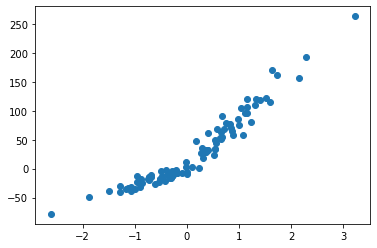

In [52]:
x, y = make_regression(n_samples=100, n_features=1, noise=10)
y = y + abs(y/2)
plt.scatter(x, y)

In [53]:
# Check dimensions
print(x.shape)
print(y.shape)

# Redimnsion y
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100,)
(100, 1)


In [54]:
# matrice X
X = np.hstack((x,np.ones(x.shape)))
X = np.hstack((x**2, X))

print(X.shape)
print(X[:10])

(100, 3)
[[ 2.37298147e-06 -1.54044846e-03  1.00000000e+00]
 [ 6.98006847e-01  8.35468040e-01  1.00000000e+00]
 [ 1.42082066e-01  3.76937749e-01  1.00000000e+00]
 [ 2.61521000e-01 -5.11391240e-01  1.00000000e+00]
 [ 9.52358200e-01  9.75888416e-01  1.00000000e+00]
 [ 1.13750539e+00  1.06653898e+00  1.00000000e+00]
 [ 5.24950793e-01 -7.24534881e-01  1.00000000e+00]
 [ 1.11455879e-01  3.33850085e-01  1.00000000e+00]
 [ 1.99136759e+00  1.41115824e+00  1.00000000e+00]
 [ 1.19823487e-01  3.46155293e-01  1.00000000e+00]]


In [55]:
theta = np.random.randn(3,1)
theta

array([[ 0.58052518],
       [-2.13667785],
       [ 1.35570356]])

# 2. Model

In [56]:
def model(X, theta):
    return X.dot(theta)

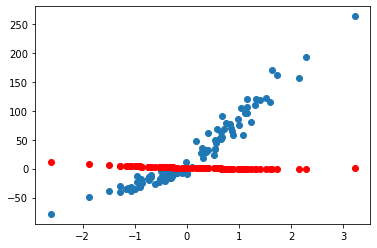

In [57]:
plt.scatter(x[:,0], y)
plt.scatter(x[:,0], model(X, theta), c="r")

# 3. Cost Function

In [58]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [59]:
cost_function(X, y, theta)

2262.3006340795914

# 4. Gradients and Gradient Descent

In [60]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [61]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
        
    return theta, cost_history

In [62]:
final_theta, cost_history = gradient_descent(X, y, theta, learning_rate=0.01, n_iterations=1000)

In [63]:
final_theta

array([[ 9.25540329],
       [56.46483909],
       [13.40454115]])

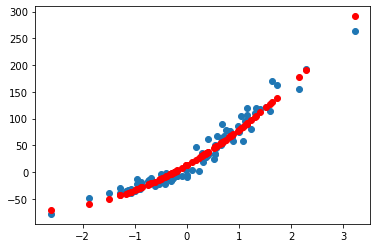

In [64]:
predictions = model(X, final_theta)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0], predictions, c='r')

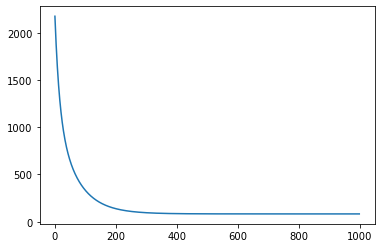

In [65]:
plt.plot(range(1000), cost_history)

In [66]:
def determination_coef(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [67]:
determination_coef(y, predictions)

0.953692105166649